In [65]:
from muler.hpf import HPFSpectrum, HPFSpectrumList
import numpy as np
import glob
from pylab import*

%config InlineBackend.figure_format='retina'

In [66]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T061633_R01_0011.optimal.fits")
file = local_files[0]

original_spectrum = HPFSpectrum(file=file, order=19) #reading in file

k2_100RV = 34786.4 # in m/s from Simbad

shifted_spectrum = original_spectrum.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

In [67]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T062631_R01_0012.optimal.fits")
file = local_files[0]

original_spectrum_2 = HPFSpectrum(file=file, order=19) 


shifted_spectrum_2 = original_spectrum_2.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

In [68]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T063628_R01_0013.optimal.fits")
file = local_files[0]

original_spectrum_3 = HPFSpectrum(file=file, order=19) 


shifted_spectrum_3 = original_spectrum_3.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

In [69]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T064625_R01_0014.optimal.fits")
file = local_files[0]

original_spectrum_4 = HPFSpectrum(file=file, order=19) 


shifted_spectrum_4 = original_spectrum_4.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

In [70]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T065622_R01_0015.optimal.fits")
file = local_files[0]

original_spectrum_5 = HPFSpectrum(file=file, order=19) 


shifted_spectrum_5 = original_spectrum_5.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

In [71]:
local_files = glob.glob("../../src/tests/data/Slope-20191227T070619_R01_0016.optimal.fits")
file = local_files[0]

original_spectrum_6 = HPFSpectrum(file=file, order=19) 


shifted_spectrum_6 = original_spectrum_6.normalize().sky_subtract().remove_nans().blaze_divide_spline().shift_spec(k2_100RV)

(10830.0, 10840.0)

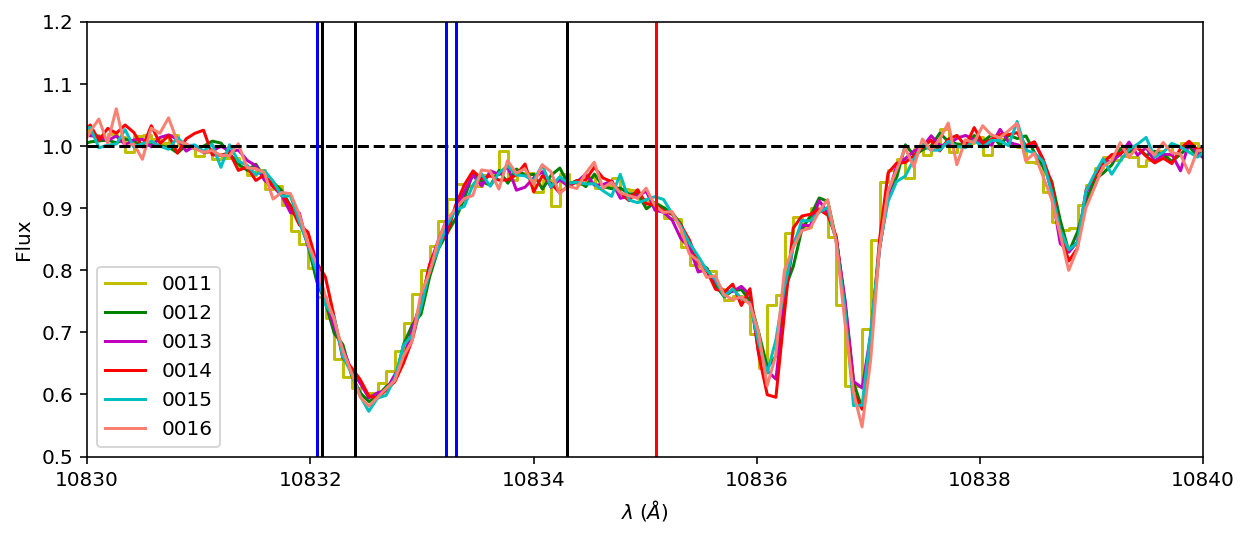

In [72]:
ax = shifted_spectrum.normalize().plot(label='0011', color='y')

plot(shifted_spectrum_2.normalize().wavelength, shifted_spectrum_2.normalize().flux, label='0012', color='g')
plot(shifted_spectrum_3.normalize().wavelength, shifted_spectrum_3.normalize().flux, label='0013', color='m')
plot(shifted_spectrum_4.normalize().wavelength, shifted_spectrum_4.normalize().flux, label='0014', color='r')
plot(shifted_spectrum_5.normalize().wavelength, shifted_spectrum_5.normalize().flux, label='0015', color='c')
plot(shifted_spectrum_6.normalize().wavelength, shifted_spectrum_6.normalize().flux, label='0016', color='salmon')


ax.axhline(1.0, linestyle='dashed', color='k')
ax.axvline(10832.1, linestyle='solid',color='k') #black lines are skylines vaccum
ax.axvline(10832.4, linestyle='solid',color='k')
ax.axvline(10834.3, linestyle='solid',color='k')
ax.axvline(10835.1, linestyle='solid',color='r') #red line is telluric vacuum
ax.axvline(10832.057, linestyle='solid',color='b') #blue lines are helium vacuum
ax.axvline(10833.217, linestyle='solid',color='b')
ax.axvline(10833.306, linestyle='solid',color='b')
ax.set_ylim(0.5, 1.2); ax.legend();
ax.set_xlim(10830,10840)

In [73]:
from specutils import Spectrum1D
import numpy as np
from astropy.nddata import StdDevUncertainty
import astropy.units as u
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [74]:
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler

In [75]:
resampler = FluxConservingResampler(extrapolation_treatment='nan_fill')

In [76]:
%%capture
#This method throws a warning for an unknown reason...
resampled_shifted_spectrum_2 = resampler(shifted_spectrum_2, shifted_spectrum.spectral_axis)
resampled_shifted_spectrum_3 = resampler(shifted_spectrum_3, shifted_spectrum.spectral_axis)
resampled_shifted_spectrum_4 = resampler(shifted_spectrum_4, shifted_spectrum.spectral_axis)
resampled_shifted_spectrum_5 = resampler(shifted_spectrum_5, shifted_spectrum.spectral_axis)
resampled_shifted_spectrum_6 = resampler(shifted_spectrum_6, shifted_spectrum.spectral_axis)

#resamples spectrum with respect to the first one

In [77]:
print(resampled_shifted_spectrum_2)

Spectrum1D (length=2040)
flux:             [ 1.0576, ..., nan ],  mean=nan
spectral axis:    [ 1.0823e+04 Angstrom, ..., 1.0961e+04 Angstrom ],  mean=1.0896e+04 Angstrom
uncertainty:      [ InverseVariance(185876.76077027), ..., InverseVariance(nan) ]


In [13]:
#Starting For Loop for construction of the function
spectralist = [shifted_spectrum, resampled_shifted_spectrum_2, resampled_shifted_spectrum_3, resampled_shifted_spectrum_4, resampled_shifted_spectrum_5, resampled_shifted_spectrum_6]
spec_final = spectralist[0]
for i in range(len(spectralist)-1):
    if i != len(spectralist)-1: 
        new_sigma = np.sqrt(1/spectralist[i+1].uncertainty.array) 
        spectralist[i+1].uncertainty = StdDevUncertainty(new_sigma)
        spec_final = spec_final.add(spectralist[i+1], propagate_uncertainties=True)
  

In [78]:
spec_list_new = [shifted_spectrum, resampled_shifted_spectrum_2, resampled_shifted_spectrum_3, resampled_shifted_spectrum_4, resampled_shifted_spectrum_5, resampled_shifted_spectrum_6]

In [79]:
# function for combining spectra
def combine_spectra (spec_list):
    spec_final = spec_list[0]
    for i in range(len(spec_list)-1):
        if i != len(spec_list)-1: 
            new_sigma = np.sqrt(1/spec_list[i+1].uncertainty.array) 
            spec_list[i+1].uncertainty = StdDevUncertainty(new_sigma)
            spec_final = spec_final.add(spec_list[i+1], propagate_uncertainties=True)
    return (spec_final)

In [80]:
new_spectra = combine_spectra(spec_list_new) #be careful to not rerun the spectra combination
print(new_spectra)


Spectrum1D (length=2040)
flux:             [ 6.4019, ..., nan ],  mean=nan
spectral axis:    [ 1.0823e+04 Angstrom, ..., 1.0961e+04 Angstrom ],  mean=1.0896e+04 Angstrom
uncertainty:      [ StdDevUncertainty(0.00576649), ..., StdDevUncertainty(nan) ]


(10825.0, 10840.0)

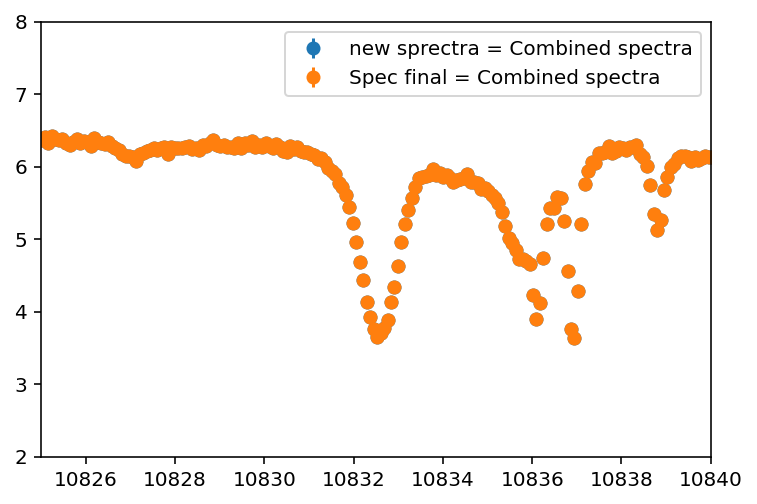

In [81]:
plt.errorbar(new_spectra.wavelength.value, new_spectra.flux.value, yerr=new_spectra.uncertainty.array,
             linestyle='none', marker='o', label='new sprectra = Combined spectra')

plt.errorbar(spec_final.wavelength.value, spec_final.flux.value, yerr=spec_final.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(2, 8)
plt.xlim(10825,10840)

In [82]:
print(new_spectra)
print(spec_final)

Spectrum1D (length=2040)
flux:             [ 6.4019, ..., nan ],  mean=nan
spectral axis:    [ 1.0823e+04 Angstrom, ..., 1.0961e+04 Angstrom ],  mean=1.0896e+04 Angstrom
uncertainty:      [ StdDevUncertainty(0.00576649), ..., StdDevUncertainty(nan) ]
Spectrum1D (length=2040)
flux:             [ 6.4019, ..., nan ],  mean=nan
spectral axis:    [ 1.0823e+04 Angstrom, ..., 1.0961e+04 Angstrom ],  mean=1.0896e+04 Angstrom
uncertainty:      [ StdDevUncertainty(0.00576649), ..., StdDevUncertainty(nan) ]


(10825.0, 10840.0)

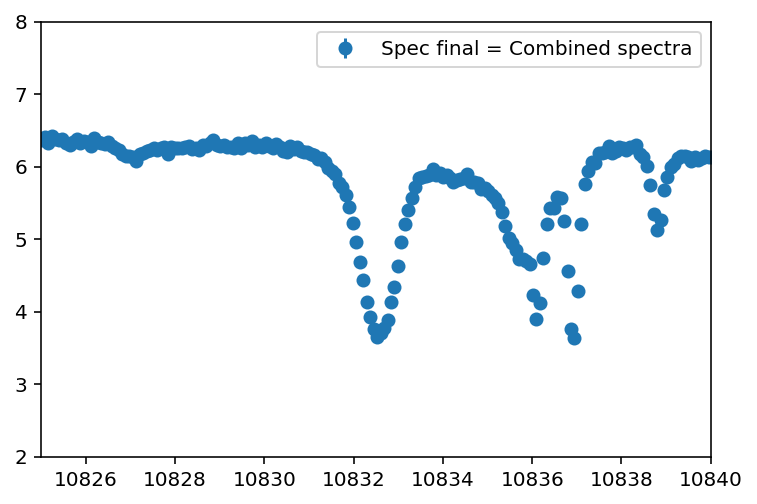

In [14]:
plt.errorbar(spec_final.wavelength.value, spec_final.flux.value, yerr=spec_final.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(2, 8)
plt.xlim(10825,10840)

In [91]:
new_sigma = np.sqrt(1/resampled_shifted_spectrum_2.uncertainty.array)

resampled_shifted_spectrum_2.uncertainty = StdDevUncertainty(new_sigma)

spec_final = shifted_spectrum.add(resampled_shifted_spectrum_2, propagate_uncertainties=True)


(10825.0, 10840.0)

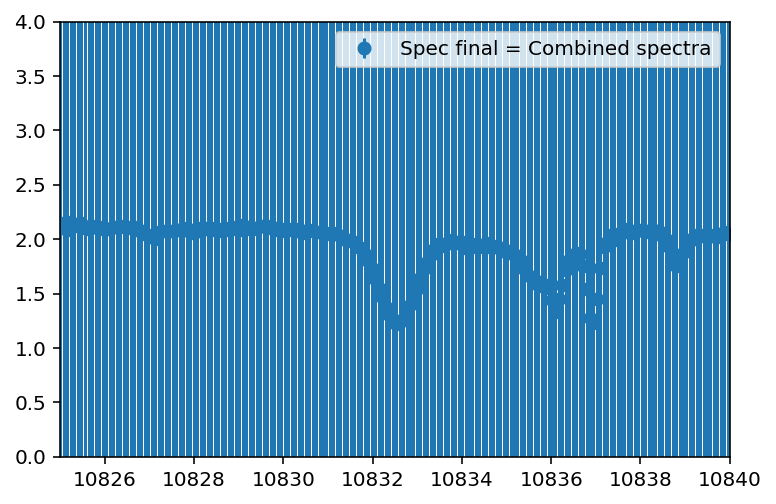

In [68]:
plt.errorbar(spec_final.wavelength.value, spec_final.flux.value, yerr=spec_final.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(0, 4)
plt.xlim(10825,10840)

In [169]:
new_sigma_2 = np.sqrt(1/resampled_shifted_spectrum_3.uncertainty.array)

resampled_shifted_spectrum_3.uncertainty = StdDevUncertainty(new_sigma_2)

spec_final_2 = spec_final.add(resampled_shifted_spectrum_3, propagate_uncertainties=True)

(10825.0, 10840.0)

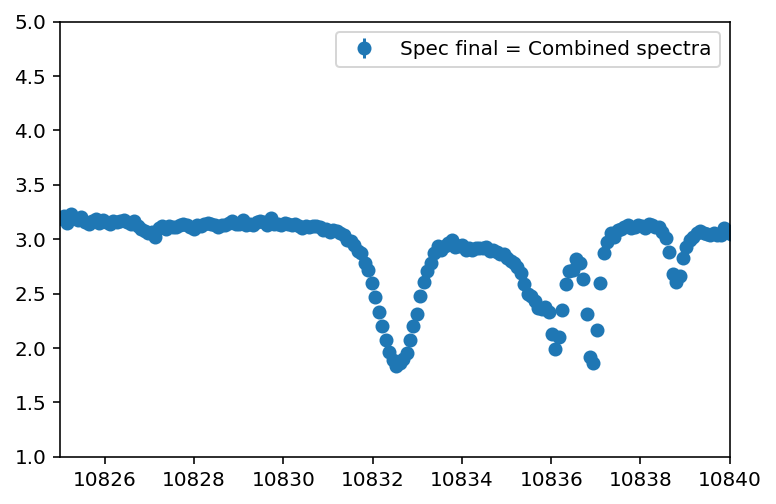

In [170]:
spec_final_2 = spec_final.add(resampled_shifted_spectrum_3, propagate_uncertainties=True)
plt.errorbar(spec_final_2.wavelength.value, spec_final_2.flux.value, yerr=spec_final_2.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(1, 5)
plt.xlim(10825,10840)

In [171]:
new_sigma_3 = np.sqrt(1/resampled_shifted_spectrum_4.uncertainty.array)

resampled_shifted_spectrum_4.uncertainty = StdDevUncertainty(new_sigma_3)

spec_final_3 = spec_final_2.add(resampled_shifted_spectrum_4, propagate_uncertainties=True)

(10825.0, 10840.0)

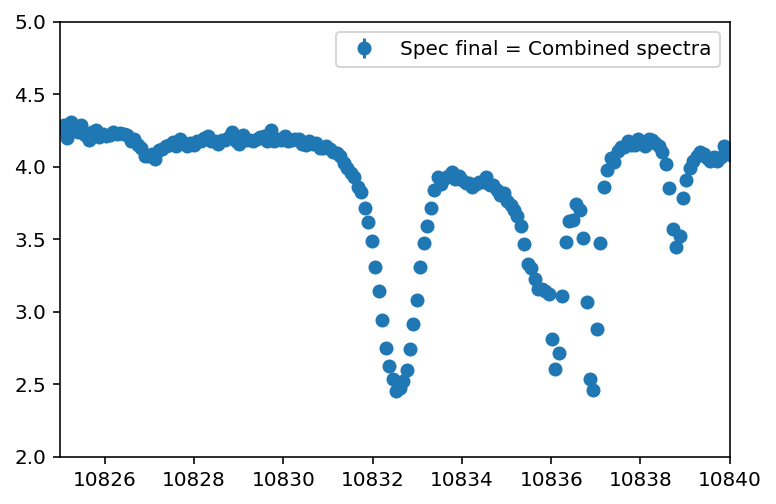

In [172]:
plt.errorbar(spec_final_3.wavelength.value, spec_final_3.flux.value, yerr=spec_final_3.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(2, 5)
plt.xlim(10825,10840)

In [173]:
new_sigma_4 = np.sqrt(1/resampled_shifted_spectrum_5.uncertainty.array)

resampled_shifted_spectrum_5.uncertainty = StdDevUncertainty(new_sigma_4)

spec_final_4 = spec_final_3.add(resampled_shifted_spectrum_5, propagate_uncertainties=True)



(10825.0, 10840.0)

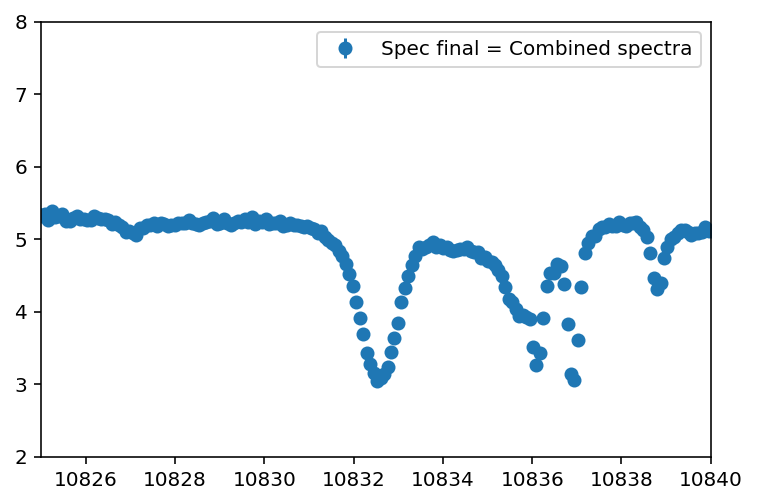

In [174]:
plt.errorbar(spec_final_4.wavelength.value, spec_final_4.flux.value, yerr=spec_final_4.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(2, 8)
plt.xlim(10825,10840)

In [21]:
new_sigma_5 = np.sqrt(1/resampled_shifted_spectrum_6.uncertainty.array)

resampled_shifted_spectrum_6.uncertainty = StdDevUncertainty(new_sigma_5)

spec_final_5 = spec_final_4.add(resampled_shifted_spectrum_6, propagate_uncertainties=True)

(10825.0, 10840.0)

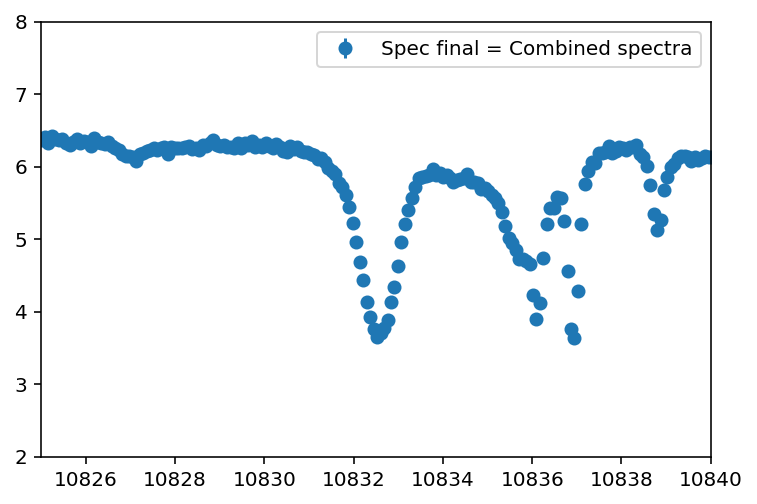

In [26]:
plt.errorbar(spec_final_5.wavelength.value, spec_final_5.flux.value, yerr=spec_final_5.uncertainty.array,
             linestyle='none', marker='o', label='Spec final = Combined spectra')

plt.legend(loc='best')
plt.ylim(2, 8)
plt.xlim(10825,10840)